Task 1: Clustering Digits Dataset with SOM (Grid Size 4x4 and 20x20)

In [ ]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=5cdde4c509112bbbd3ba8d761aef567f7b30aa1ba39e087fcbfefc26d2aac764
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


Task 1: Clustering Digits Dataset with SOM (Grid Size 4x4 and 20x20) - update code



Evaluating SOM Grid Size: 4x4
Sigma: 0.5, Epochs: 50 -> Q_Error: 1.7550, Silhouette: 0.1034, Dead Neurons: 0
Sigma: 0.5, Epochs: 100 -> Q_Error: 1.7061, Silhouette: 0.1250, Dead Neurons: 0
Sigma: 0.5, Epochs: 200 -> Q_Error: 1.6309, Silhouette: 0.1495, Dead Neurons: 0
Sigma: 1.0, Epochs: 50 -> Q_Error: 1.7572, Silhouette: 0.1258, Dead Neurons: 0
Sigma: 1.0, Epochs: 100 -> Q_Error: 1.7346, Silhouette: 0.1405, Dead Neurons: 0
Sigma: 1.0, Epochs: 200 -> Q_Error: 1.6980, Silhouette: 0.1182, Dead Neurons: 0
Sigma: 1.5, Epochs: 50 -> Q_Error: 1.8465, Silhouette: 0.0840, Dead Neurons: 0
Sigma: 1.5, Epochs: 100 -> Q_Error: 1.8115, Silhouette: 0.1153, Dead Neurons: 0
Sigma: 1.5, Epochs: 200 -> Q_Error: 1.7244, Silhouette: 0.1308, Dead Neurons: 0
Sigma: 2.0, Epochs: 50 -> Q_Error: 1.8844, Silhouette: 0.0913, Dead Neurons: 0
Sigma: 2.0, Epochs: 100 -> Q_Error: 1.8405, Silhouette: 0.1017, Dead Neurons: 0
Sigma: 2.0, Epochs: 200 -> Q_Error: 1.8211, Silhouette: 0.1169, Dead Neurons: 0

Best configu

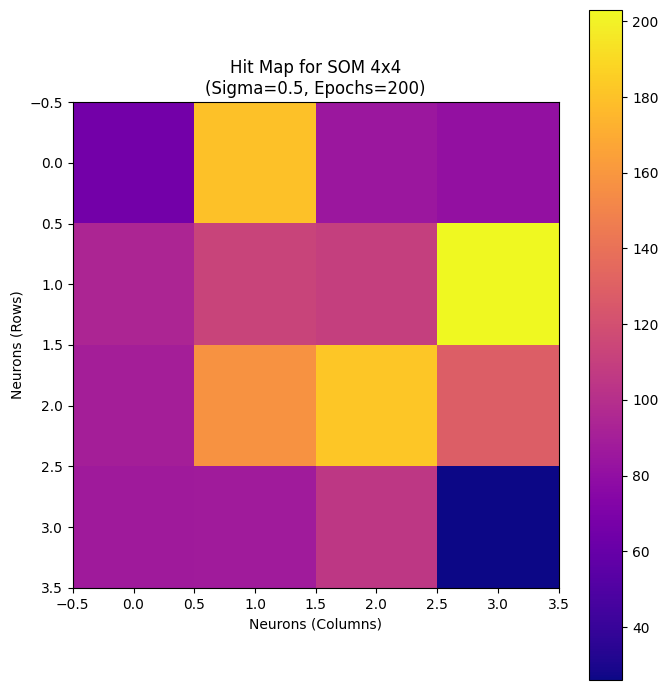

<ipython-input-11-e5714831f495>:66: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set3', 10)  # استفاده از colormap متفاوت


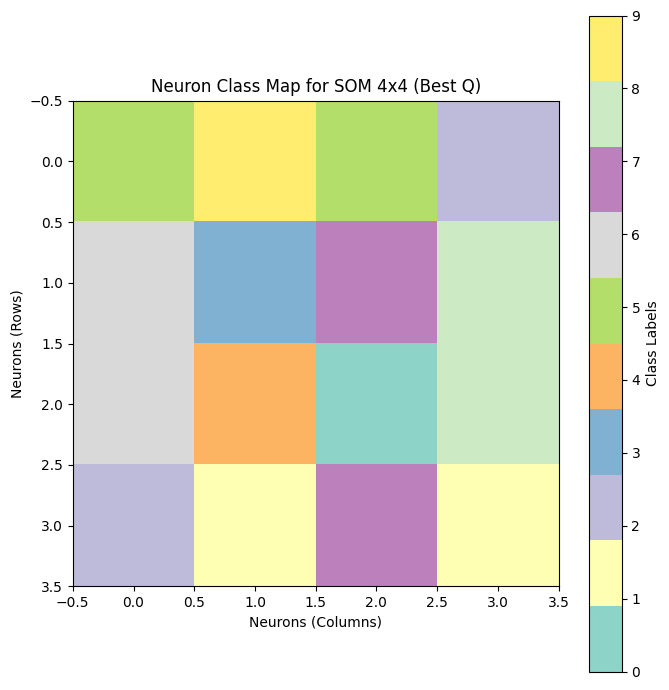


Evaluating SOM Grid Size: 20x20
Sigma: 0.5, Epochs: 50 -> Q_Error: 1.0019, Silhouette: 0.0156, Dead Neurons: 5
Sigma: 0.5, Epochs: 100 -> Q_Error: 1.0090, Silhouette: 0.0060, Dead Neurons: 9
Sigma: 0.5, Epochs: 200 -> Q_Error: 0.9955, Silhouette: 0.0161, Dead Neurons: 8
Sigma: 1.0, Epochs: 50 -> Q_Error: 1.0196, Silhouette: 0.0206, Dead Neurons: 6
Sigma: 1.0, Epochs: 100 -> Q_Error: 1.0360, Silhouette: 0.0235, Dead Neurons: 19
Sigma: 1.0, Epochs: 200 -> Q_Error: 1.0603, Silhouette: 0.0211, Dead Neurons: 28
Sigma: 1.5, Epochs: 50 -> Q_Error: 1.0801, Silhouette: 0.0163, Dead Neurons: 23
Sigma: 1.5, Epochs: 100 -> Q_Error: 1.1278, Silhouette: 0.0178, Dead Neurons: 51
Sigma: 1.5, Epochs: 200 -> Q_Error: 1.2051, Silhouette: 0.0078, Dead Neurons: 104
Sigma: 2.0, Epochs: 50 -> Q_Error: 1.1309, Silhouette: 0.0171, Dead Neurons: 41
Sigma: 2.0, Epochs: 100 -> Q_Error: 1.2401, Silhouette: 0.0025, Dead Neurons: 93
Sigma: 2.0, Epochs: 200 -> Q_Error: 1.3476, Silhouette: -0.0118, Dead Neurons: 151


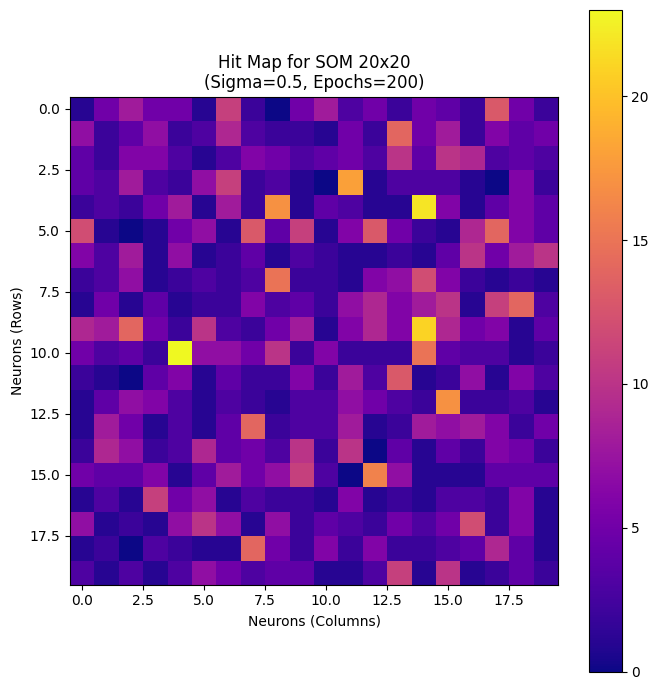

<ipython-input-11-e5714831f495>:66: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set3', 10)  # استفاده از colormap متفاوت


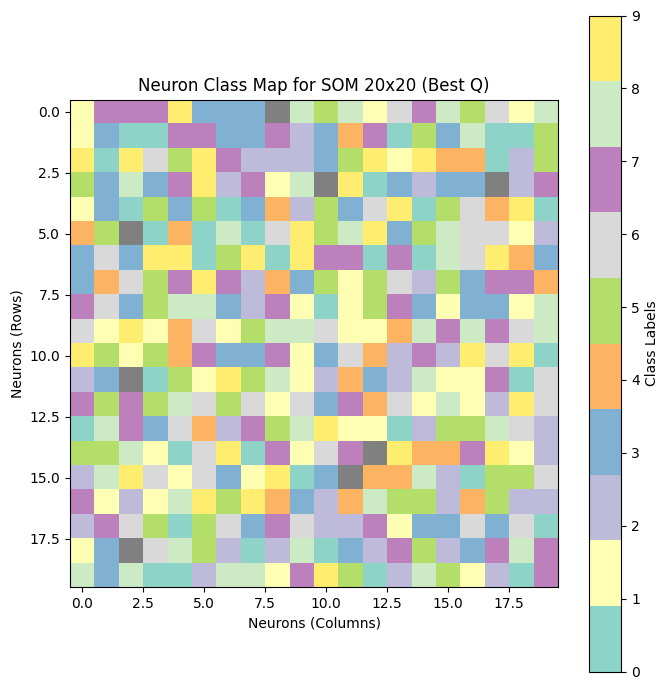


=== Summary of Experiment Results ===
Grid: 4x4
  Best Quantization Error Config: Sigma = 0.5, Epochs = 200, Q_Error = 1.6309, Silhouette = 0.1495, Dead Neurons = 0
  Best Silhouette Config: Sigma = 0.5, Epochs = 200, Q_Error = 1.6309, Silhouette = 0.1495, Dead Neurons = 0
---------------------------------------------------
Grid: 20x20
  Best Quantization Error Config: Sigma = 0.5, Epochs = 200, Q_Error = 0.9955, Silhouette = 0.0161, Dead Neurons = 8
  Best Silhouette Config: Sigma = 1.0, Epochs = 100, Q_Error = 1.0360, Silhouette = 0.0235, Dead Neurons = 19
---------------------------------------------------


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

def compute_hit_map(som, data):
    """
    محاسبه hit map: تعداد داده‌های نگاشت‌شده به هر نورون
    و ذخیره نمونه‌های مربوط به هر نورون.
    """
    m, n = som._weights.shape[:2]
    hit_map = np.zeros((m, n), dtype=int)
    neuron_to_samples = {(i, j): [] for i in range(m) for j in range(n)}
    for idx, x in enumerate(data):
        bmu = som.winner(x)
        hit_map[bmu] += 1
        neuron_to_samples[bmu].append(idx)
    return hit_map, neuron_to_samples

def get_cluster_labels(som, data):
    """
    محاسبه برچسب هر داده بر اساس نورون برنده (BMU).
    شماره نورون از ترکیب مختصات (i, j) با فرمول i*n + j به دست می‌آید.
    """
    m, n = som._weights.shape[:2]
    labels = []
    for x in data:
        bmu = som.winner(x)
        label = bmu[0] * n + bmu[1]
        labels.append(label)
    return np.array(labels)

def safe_quantization_error(som, data):
    """
    محاسبه خطای کوانتیزاسیون:
    میانگین فاصله اقلیدسی بین هر نمونه ورودی و وزن نورون برنده آن.
    """
    error = 0.0
    for x in data:
        bmu = som.winner(x)
        error += np.linalg.norm(x - som._weights[bmu])
    return error / len(data)

def plot_neuron_class_map(som, data, true_labels, title="Neuron Class Map (Dead neurons marked as -1)"):
    """
    رسم نقشه‌ی کلاس نورون‌ها:
    برای هر نورون، برچسب اکثریت نمونه‌های نگاشت‌شده محاسبه شده و در یک نقشه‌ی دو‌بعدی نمایش داده می‌شود.
    نورون‌هایی که هیچ داده‌ای به آن‌ها نگاشت نشده‌اند، به صورت -1 و با رنگ خاکستری نمایش داده می‌شوند.
    """
    m, n = som._weights.shape[:2]
    _, neuron_to_samples = compute_hit_map(som, data)
    neuron_class_map = np.full((m, n), -1, dtype=int)

    for i in range(m):
        for j in range(n):
            indices = neuron_to_samples[(i, j)]
            if indices:
                assigned_labels = true_labels[indices]
                counts = np.bincount(assigned_labels)
                majority_label = np.argmax(counts)
                neuron_class_map[i, j] = majority_label

    masked_map = np.ma.masked_where(neuron_class_map == -1, neuron_class_map)
    cmap = plt.cm.get_cmap('Set3', 10)  # استفاده از colormap متفاوت
    cmap.set_bad(color='grey')           # نورون‌های dead با رنگ خاکستری

    plt.figure(figsize=(7, 7))
    plt.imshow(masked_map, cmap=cmap, interpolation='nearest')
    cbar = plt.colorbar(ticks=range(10))
    cbar.set_label('Class Labels')
    plt.title(title)
    plt.xlabel("Neurons (Columns)")
    plt.ylabel("Neurons (Rows)")
    plt.tight_layout()
    plt.show()

def plot_hit_map(hit_map, grid, sigma, epochs):
    """
    رسم hit map با استفاده از colormap جدید (plasma) و استایل بهبود یافته.
    """
    plt.figure(figsize=(7, 7))
    plt.imshow(hit_map, cmap='plasma', interpolation='nearest')
    plt.colorbar()
    plt.title(f'Hit Map for SOM {grid[0]}x{grid[1]}\n(Sigma={sigma}, Epochs={epochs})')
    plt.xlabel('Neurons (Columns)')
    plt.ylabel('Neurons (Rows)')
    plt.tight_layout()
    plt.show()

def run_som_experiment(data, labels, grid, sigma_values, epoch_values):
    """
    اجرای آزمایش SOM برای یک grid خاص و یافتن بهترین تنظیمات
    بر اساس خطای کوانتیزاسیون و Silhouette Score.
    """
    m, n = grid
    best_q_error = np.inf
    best_sil_score = -np.inf
    best_config_q = None
    best_config_sil = None
    best_model_q = None
    best_model_sil = None

    print(f"\nEvaluating SOM Grid Size: {m}x{n}")
    for sigma in sigma_values:
        for epochs in epoch_values:
            som = MiniSom(m, n, data.shape[1], sigma=sigma, learning_rate=0.5)
            som.random_weights_init(data)
            som.train_random(data, epochs)

            q_error = safe_quantization_error(som, data)
            cluster_labels = get_cluster_labels(som, data)
            try:
                sil_score = silhouette_score(data, cluster_labels)
            except Exception:
                sil_score = -1

            hit_map, _ = compute_hit_map(som, data)
            dead_neurons = np.sum(hit_map == 0)

            print(f"Sigma: {sigma}, Epochs: {epochs} -> Q_Error: {q_error:.4f}, Silhouette: {sil_score:.4f}, Dead Neurons: {dead_neurons}")

            if q_error < best_q_error:
                best_q_error = q_error
                best_config_q = (sigma, epochs, q_error, sil_score, dead_neurons)
                best_model_q = som

            if sil_score > best_sil_score:
                best_sil_score = sil_score
                best_config_sil = (sigma, epochs, q_error, sil_score, dead_neurons)
                best_model_sil = som

    print(f"\nBest configuration for grid {m}x{n} based on Quantization Error:")
    print(f"  Sigma = {best_config_q[0]}, Epochs = {best_config_q[1]}, Q_Error = {best_config_q[2]:.4f}, Silhouette = {best_config_q[3]:.4f}, Dead Neurons = {best_config_q[4]}")
    print(f"Best configuration for grid {m}x{n} based on Silhouette Score:")
    print(f"  Sigma = {best_config_sil[0]}, Epochs = {best_config_sil[1]}, Q_Error = {best_config_sil[2]:.4f}, Silhouette = {best_config_sil[3]:.4f}, Dead Neurons = {best_config_sil[4]}")

    return best_model_q, best_config_q, best_model_sil, best_config_sil

def main():
    # بارگذاری و نرمال‌سازی داده‌ها
    digits = load_digits()
    data = digits.data
    labels = digits.target
    scaler = MinMaxScaler()
    data_norm = scaler.fit_transform(data)

    # تنظیم پارامترهای آزمایش
    sigma_values = [0.5, 1.0, 1.5, 2.0]
    epoch_values = [50, 100, 200]
    grid_sizes = [(4, 4), (20, 20)]
    experiment_results = []

    # اجرای آزمایش برای هر grid و نمایش خروجی‌های بهبود یافته
    for grid in grid_sizes:
        best_model_q, best_config_q, best_model_sil, best_config_sil = run_som_experiment(data_norm, labels, grid, sigma_values, epoch_values)

        hit_map, _ = compute_hit_map(best_model_q, data_norm)
        plot_hit_map(hit_map, grid, best_config_q[0], best_config_q[1])
        plot_neuron_class_map(
            best_model_q, data_norm, labels,
            title=f"Neuron Class Map for SOM {grid[0]}x{grid[1]} (Best Q)"
        )

        experiment_results.append({
            "grid": f"{grid[0]}x{grid[1]}",
            "best_q": best_config_q,
            "best_sil": best_config_sil
        })

    # نمایش خلاصه نتایج آزمایش‌ها
    print("\n=== Summary of Experiment Results ===")
    for res in experiment_results:
        print(f"Grid: {res['grid']}")
        print(f"  Best Quantization Error Config: Sigma = {res['best_q'][0]}, Epochs = {res['best_q'][1]}, "
              f"Q_Error = {res['best_q'][2]:.4f}, Silhouette = {res['best_q'][3]:.4f}, Dead Neurons = {res['best_q'][4]}")
        print(f"  Best Silhouette Config: Sigma = {res['best_sil'][0]}, Epochs = {res['best_sil'][1]}, "
              f"Q_Error = {res['best_sil'][2]:.4f}, Silhouette = {res['best_sil'][3]:.4f}, Dead Neurons = {res['best_sil'][4]}")
        print("---------------------------------------------------")

if __name__ == "__main__":
    main()


Task 2: Classification of Digits Dataset Using SOM


=== Evaluating Grid 4x4 ===
Grid: (4, 4), Sigma: 0.5, Epochs: 50, Seed: 42 -> Accuracy: 0.7315, AUC: 0.8538935832797498
Grid: (4, 4), Sigma: 0.5, Epochs: 50, Seed: 7 -> Accuracy: 0.7241, AUC: 0.8438264260906502
Grid: (4, 4), Sigma: 0.5, Epochs: 50, Seed: 123 -> Accuracy: 0.5889, AUC: 0.7776345929820735
Grid: (4, 4), Sigma: 0.5, Epochs: 100, Seed: 42 -> Accuracy: 0.8000, AUC: 0.8900647687722094
Grid: (4, 4), Sigma: 0.5, Epochs: 100, Seed: 7 -> Accuracy: 0.6889, AUC: 0.8353542309593592
Grid: (4, 4), Sigma: 0.5, Epochs: 100, Seed: 123 -> Accuracy: 0.6519, AUC: 0.809031585216337
Grid: (4, 4), Sigma: 0.5, Epochs: 200, Seed: 42 -> Accuracy: 0.7296, AUC: 0.8506640751750775
Grid: (4, 4), Sigma: 0.5, Epochs: 200, Seed: 7 -> Accuracy: 0.7722, AUC: 0.8756814177478922
Grid: (4, 4), Sigma: 0.5, Epochs: 200, Seed: 123 -> Accuracy: 0.8667, AUC: 0.9264336770176611
Grid: (4, 4), Sigma: 1.0, Epochs: 50, Seed: 42 -> Accuracy: 0.7852, AUC: 0.8779039600351272
Grid: (4, 4), Sigma: 1.0, Epochs: 50, Seed: 7 

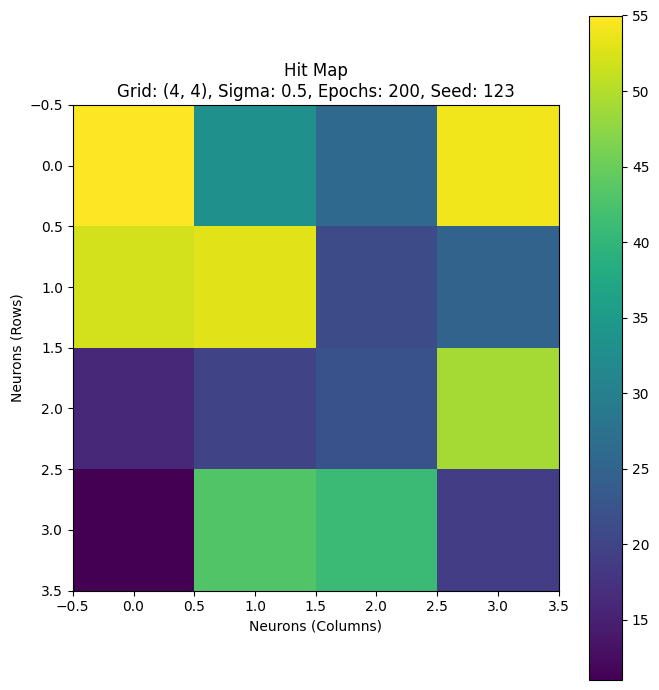

<ipython-input-10-b94caa241510>:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', 10)


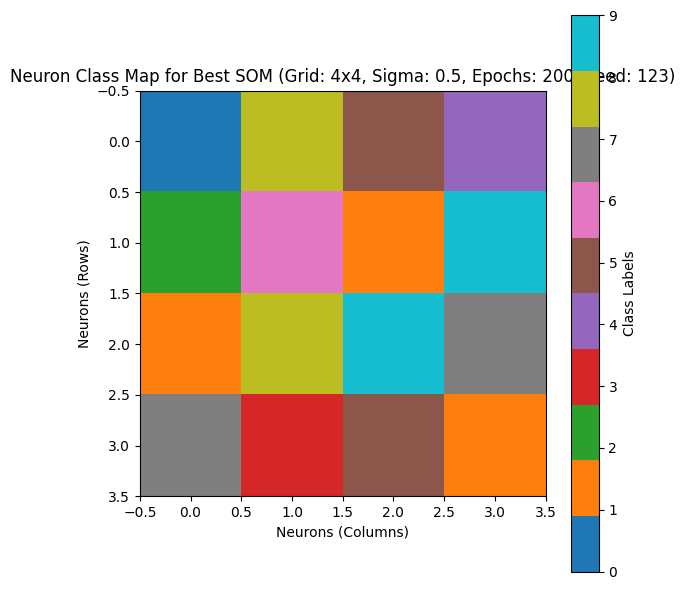


=== Evaluating Grid 20x20 ===
Grid: (20, 20), Sigma: 0.5, Epochs: 50, Seed: 42 -> Accuracy: 0.9593, AUC: 0.9784632171752422
Grid: (20, 20), Sigma: 0.5, Epochs: 50, Seed: 7 -> Accuracy: 0.9593, AUC: 0.9775866508663734
Grid: (20, 20), Sigma: 0.5, Epochs: 50, Seed: 123 -> Accuracy: 0.9704, AUC: 0.9834581564428715
Grid: (20, 20), Sigma: 0.5, Epochs: 100, Seed: 42 -> Accuracy: 0.9593, AUC: 0.9790890282760035
Grid: (20, 20), Sigma: 0.5, Epochs: 100, Seed: 7 -> Accuracy: 0.9556, AUC: 0.9763293629433532
Grid: (20, 20), Sigma: 0.5, Epochs: 100, Seed: 123 -> Accuracy: 0.9278, AUC: 0.9620543002278341
Grid: (20, 20), Sigma: 0.5, Epochs: 200, Seed: 42 -> Accuracy: 0.9481, AUC: 0.9722329456933492
Grid: (20, 20), Sigma: 0.5, Epochs: 200, Seed: 7 -> Accuracy: 0.9667, AUC: 0.9821101874012182
Grid: (20, 20), Sigma: 0.5, Epochs: 200, Seed: 123 -> Accuracy: 0.9574, AUC: 0.9763422642173113
Grid: (20, 20), Sigma: 1.0, Epochs: 50, Seed: 42 -> Accuracy: 0.9463, AUC: 0.9724455344822452
Grid: (20, 20), Sigma: 

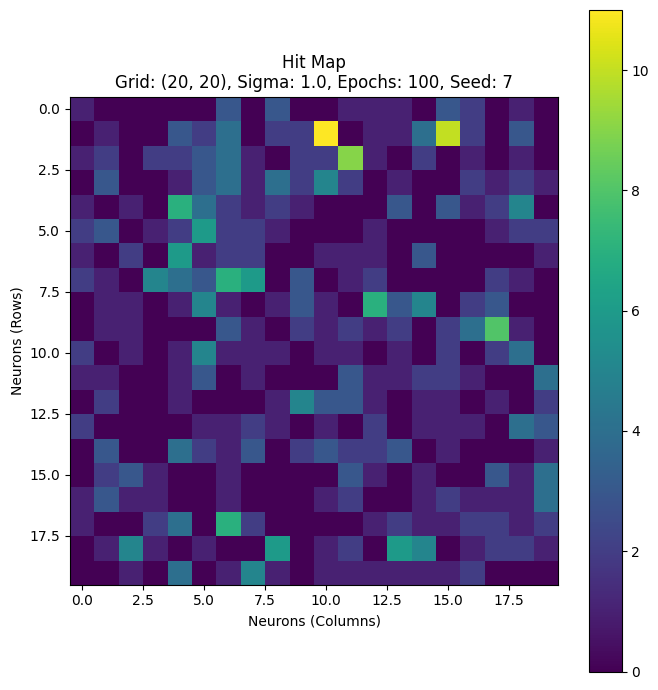

<ipython-input-10-b94caa241510>:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', 10)


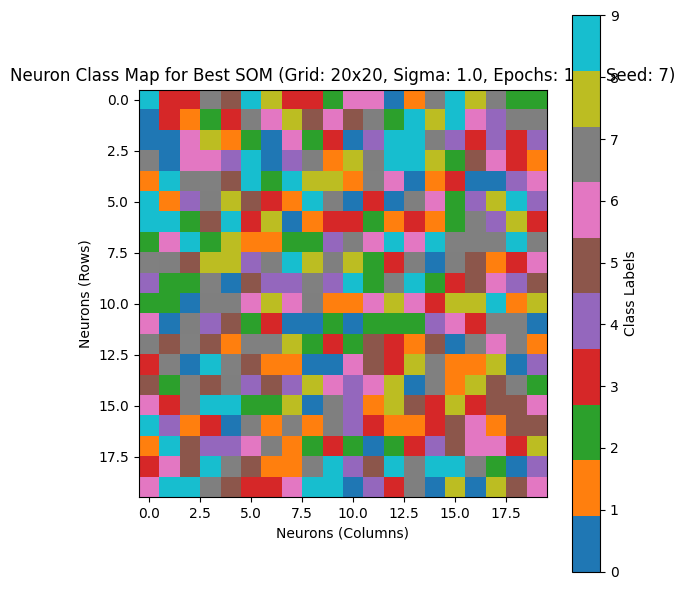

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from itertools import product

# -----------------------------------------------------------------------
# محاسبه hit map: نگاشت تعداد نمونه‌های ورودی به هر نورون و ذخیره اندیس‌ها
# -----------------------------------------------------------------------
def compute_hit_map(som, data):
    m, n = som._weights.shape[:2]
    hit_map = np.zeros((m, n), dtype=int)
    neuron_to_samples = {(i, j): [] for i in range(m) for j in range(n)}
    for idx, x in enumerate(data):
        bmu = som.winner(x)
        hit_map[bmu] += 1
        neuron_to_samples[bmu].append(idx)
    return hit_map, neuron_to_samples

# -----------------------------------------------------------------------
# رسم نقشه کلاس نورون‌ها (علامت‌گذاری نورون‌های بدون داده به عنوان dead با رنگ خاکستری)
# -----------------------------------------------------------------------
def plot_neuron_class_map(som, X, y, title="Neuron Class Map (Dead neurons marked as -1)"):
    m, n = som._weights.shape[:2]
    mapping = {(i, j): [] for i in range(m) for j in range(n)}
    for idx, x in enumerate(X):
        winner = som.winner(x)
        mapping[winner].append(y[idx])

    # تعیین برچسب اکثریت برای هر نورون؛ نورون‌های بدون داده مقدار -1 خواهند داشت.
    neuron_class_map = np.full((m, n), -1, dtype=int)
    for i in range(m):
        for j in range(n):
            if mapping[(i, j)]:
                counts = np.bincount(mapping[(i, j)])
                majority_label = np.argmax(counts)
                neuron_class_map[i, j] = majority_label

    # رسم نقشه با استفاده از colormap مناسب؛ نورون‌های dead با رنگ خاکستری نمایش داده می‌شوند
    masked_map = np.ma.masked_where(neuron_class_map == -1, neuron_class_map)
    cmap = plt.cm.get_cmap('tab10', 10)
    cmap.set_bad(color='gray')

    plt.figure(figsize=(6, 6))
    plt.imshow(masked_map, cmap=cmap, origin='upper', interpolation='nearest')
    cbar = plt.colorbar(ticks=range(10))
    cbar.set_label("Class Labels")
    plt.title(title)
    plt.xlabel("Neurons (Columns)")
    plt.ylabel("Neurons (Rows)")
    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------------------
# ایجاد، آموزش و ارزیابی شبکه SOM
# -----------------------------------------------------------------------
def train_and_evaluate_som(som_shape, sigma, epochs, seed, X_train, y_train, X_test, y_test):
    np.random.seed(seed)
    m, n = som_shape
    # ساخت و آموزش SOM
    som = MiniSom(m, n, X_train.shape[1], sigma=sigma, learning_rate=0.5)
    som.random_weights_init(X_train)
    som.train_random(X_train, epochs)

    # تعیین برچسب هر نورون با رأی‌گیری اکثریت نمونه‌های آموزش
    mapping = {(i, j): [] for i in range(m) for j in range(n)}
    for idx, x in enumerate(X_train):
        winner = som.winner(x)
        mapping[winner].append(y_train[idx])

    neuron_labels = {}
    for key in mapping:
        if mapping[key]:
            counts = np.bincount(mapping[key])
            neuron_labels[key] = np.argmax(counts)
        else:
            neuron_labels[key] = -1  # نورون مرده

    # طبقه‌بندی نمونه‌های تست
    y_pred = np.array([neuron_labels[som.winner(x)] for x in X_test])

    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)

    # محاسبه AUC برای طبقه‌بندی چندکلاسه با روش One-vs-Rest
    classes = np.arange(10)
    y_test_bin = label_binarize(y_test, classes=classes)
    y_pred_bin = label_binarize(y_pred, classes=classes)
    try:
        auc = roc_auc_score(y_test_bin, y_pred_bin, multi_class='ovr')
    except Exception:
        auc = None

    hit_map, _ = compute_hit_map(som, X_test)

    return {
        "som": som,
        "accuracy": accuracy,
        "confusion_matrix": cm,
        "classification_report": report,
        "auc": auc,
        "hit_map": hit_map,
        "params": {"grid": som_shape, "sigma": sigma, "epochs": epochs, "seed": seed}
    }

# -----------------------------------------------------------------------
# اجرای آزمایش برای یک شبکه با سایز مشخص و بازگشت بهترین نتیجه
# -----------------------------------------------------------------------
def run_experiment(grid_shape, sigma_values, epoch_values, seeds, X_train, y_train, X_test, y_test):
    results = []
    for sigma, epochs, seed in product(sigma_values, epoch_values, seeds):
        res = train_and_evaluate_som(grid_shape, sigma, epochs, seed, X_train, y_train, X_test, y_test)
        results.append(res)
        auc_disp = res['auc'] if res['auc'] is not None else 'N/A'
        print(f"Grid: {grid_shape}, Sigma: {sigma}, Epochs: {epochs}, Seed: {seed} -> Accuracy: {res['accuracy']:.4f}, AUC: {auc_disp}")

    # انتخاب بهترین نتیجه بر اساس بیشترین دقت، در صورت تساوی از AUC استفاده می‌شود
    best_result = max(results, key=lambda r: (r["accuracy"], r["auc"] if r["auc"] is not None else 0))
    return best_result, results

# -----------------------------------------------------------------------
# رسم نمودار hit map با بهبود استایل و جزئیات
# -----------------------------------------------------------------------
def plot_hit_map(hit_map, params):
    plt.figure(figsize=(7, 7))
    plt.imshow(hit_map, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    grid = params["grid"]
    plt.title(f"Hit Map\nGrid: {grid}, Sigma: {params['sigma']}, Epochs: {params['epochs']}, Seed: {params['seed']}")
    plt.xlabel("Neurons (Columns)")
    plt.ylabel("Neurons (Rows)")
    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------------------
# تابع اصلی: بارگذاری داده، تقسیم‌بندی، اجرای آزمایش‌ها و نمایش نتایج
# -----------------------------------------------------------------------
def main():
    # بارگذاری دیتاست و نرمال‌سازی
    digits = load_digits()
    data = digits.data
    labels = digits.target
    scaler = MinMaxScaler()
    data_normalized = scaler.fit_transform(data)

    # تقسیم داده به آموزش (70٪) و تست (30٪)
    X_train, X_test, y_train, y_test = train_test_split(data_normalized, labels, test_size=0.3, random_state=42)

    # تنظیمات آزمایش
    sigma_values = [0.5, 1.0, 1.5, 2.0]
    epoch_values = [50, 100, 200]
    seeds = [42, 7, 123]
    grids = {"4x4": (4, 4), "20x20": (20, 20)}
    best_results = {}

    # اجرای آزمایش برای هر شبکه
    for grid_name, grid_shape in grids.items():
        print(f"\n=== Evaluating Grid {grid_name} ===")
        best_result, _ = run_experiment(grid_shape, sigma_values, epoch_values, seeds, X_train, y_train, X_test, y_test)
        best_results[grid_name] = best_result
        print(f"\n=== Best Result for Grid {grid_name} ===")
        print(f"Grid: {best_result['params']['grid']}, Sigma: {best_result['params']['sigma']}, Epochs: {best_result['params']['epochs']}, Seed: {best_result['params']['seed']}")
        print(f"Accuracy: {best_result['accuracy']:.4f}")
        auc_disp = best_result['auc'] if best_result['auc'] is not None else 'N/A'
        print(f"AUC: {auc_disp}")
        print("Confusion Matrix:")
        print(best_result["confusion_matrix"])
        print("Classification Report:")
        print(best_result["classification_report"])

        # رسم نمودار hit map و نقشه کلاس نورون‌ها
        plot_hit_map(best_result["hit_map"], best_result["params"])
        plot_neuron_class_map(
            best_result["som"], X_train, y_train,
            title=(f"Neuron Class Map for Best SOM (Grid: {grid_name}, Sigma: {best_result['params']['sigma']}, "
                   f"Epochs: {best_result['params']['epochs']}, Seed: {best_result['params']['seed']})")
        )

if __name__ == "__main__":
    main()


Task 3: Classification with Single Layer Feedforward Network (SLFN)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# بارگذاری و پیش‌پردازش دیتاست Titanic
df = pd.read_csv("/content/titanic.csv")
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

X = df.drop(columns=['Survived'])
y = df['Survived']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# تعریف شبکه پیش‌رونده ساده با تابع‌های تغییر یافته
class SimpleFFN:
    def __init__(self, input_dim, hidden_dim):
        np.random.seed(42)
        # وزن‌ها و بایاس‌های لایه پنهان و خروجی
        self.w_hidden = np.random.randn(input_dim, hidden_dim)
        self.b_hidden = np.zeros((1, hidden_dim))
        self.w_out = np.random.randn(hidden_dim, 1)
        self.b_out = np.zeros((1, 1))

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def calc_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        # محاسبه هزینه با آنتروپی متقاطع
        return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

    def forward_pass(self, X):
        self.hidden_input = np.dot(X, self.w_hidden) + self.b_hidden
        self.hidden_output = self.relu(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.w_out) + self.b_out
        self.final_output = self.sigmoid(self.final_input)
        return self.final_output

    def backprop(self, X, y, output, lr):
        m = X.shape[0]
        y = y.reshape(-1, 1)
        grad_output = output - y
        grad_w_out = np.dot(self.hidden_output.T, grad_output) / m
        grad_b_out = np.sum(grad_output, axis=0, keepdims=True) / m
        grad_hidden = np.dot(grad_output, self.w_out.T)
        grad_hidden_input = grad_hidden * self.relu_derivative(self.hidden_input)
        grad_w_hidden = np.dot(X.T, grad_hidden_input) / m
        grad_b_hidden = np.sum(grad_hidden_input, axis=0, keepdims=True) / m

        self.w_out -= lr * grad_w_out
        self.b_out -= lr * grad_b_out
        self.w_hidden -= lr * grad_w_hidden
        self.b_hidden -= lr * grad_b_hidden

    def fit(self, X, y, epochs=8000, lr=0.001):
        loss_history = []
        for _ in range(epochs):
            output = self.forward_pass(X)
            loss = self.calc_loss(y, output)
            loss_history.append(loss)
            self.backprop(X, y, output, lr)
        return loss_history

    def classify(self, X):
        prob = self.forward_pass(X)
        return (prob > 0.5).astype(int)

# اجرای اعتبارسنجی متقابل ۵ فولدی
kf = KFold(n_splits=10, shuffle=True, random_state=42)
best_accuracy = 0
best_data = {}

fold = 1
for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.to_numpy()[train_idx], y.to_numpy()[test_idx]

    model = SimpleFFN(input_dim=X_train.shape[1], hidden_dim=20)
    loss_curve = model.fit(X_train, y_train, epochs=8000, lr=0.001)

    y_pred = model.classify(X_test).flatten()
    y_prob = model.forward_pass(X_test).flatten()

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1_val = f1_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_val = auc(fpr, tpr)

    print(f"Fold {fold} - Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1_val:.3f}, AUC: {auc_val:.3f}")

    if acc > best_accuracy:
        best_accuracy = acc
        best_data = {"loss_curve": loss_curve,
                     "y_test": y_test,
                     "y_pred": y_pred,
                     "y_prob": y_prob,
                     "fpr": fpr,
                     "tpr": tpr,
                     "auc": auc_val}
    fold += 1

print("\nBest model accuracy: {:.3f}".format(best_accuracy))


Fold 1 - Accuracy: 0.756, Precision: 0.667, Recall: 0.778, F1: 0.718, AUC: 0.818
Fold 2 - Accuracy: 0.798, Precision: 0.833, Recall: 0.658, F1: 0.735, AUC: 0.785
Fold 3 - Accuracy: 0.787, Precision: 0.781, Recall: 0.676, F1: 0.725, AUC: 0.801
Fold 4 - Accuracy: 0.764, Precision: 0.696, Recall: 0.533, F1: 0.604, AUC: 0.702
Fold 5 - Accuracy: 0.820, Precision: 0.806, Recall: 0.763, F1: 0.784, AUC: 0.848
Fold 6 - Accuracy: 0.831, Precision: 0.840, Recall: 0.656, F1: 0.737, AUC: 0.824
Fold 7 - Accuracy: 0.730, Precision: 0.680, Recall: 0.515, F1: 0.586, AUC: 0.751
Fold 8 - Accuracy: 0.764, Precision: 0.773, Recall: 0.515, F1: 0.618, AUC: 0.784
Fold 9 - Accuracy: 0.742, Precision: 0.815, Recall: 0.550, F1: 0.657, AUC: 0.870
Fold 10 - Accuracy: 0.798, Precision: 0.630, Recall: 0.680, F1: 0.654, AUC: 0.885

Best model accuracy: 0.831


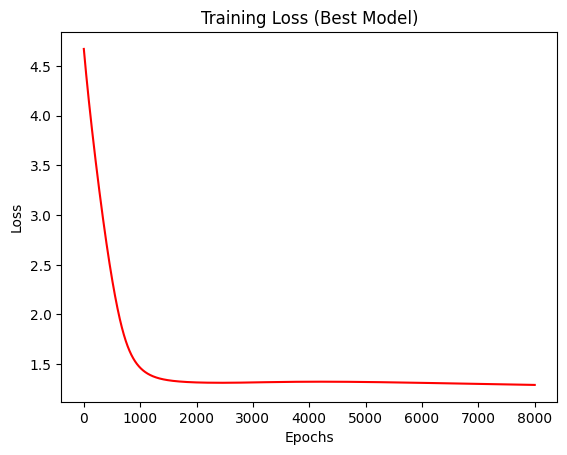

In [3]:
# رسم نمودار Training Loss (به رنگ قرمز)
plt.figure()
plt.plot(best_data["loss_curve"], color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss (Best Model)")
plt.show()

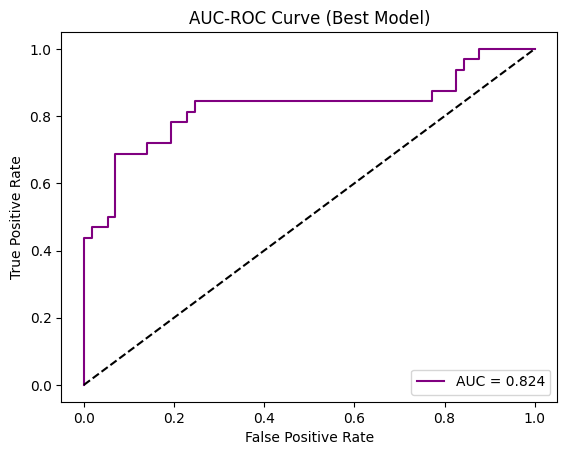

In [4]:
# رسم نمودار AUC-ROC با خط به رنگ بنفش
plt.figure()
plt.plot(best_data["fpr"], best_data["tpr"], color='purple', label='AUC = %0.3f' % best_data["auc"])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve (Best Model)")
plt.legend(loc="lower right")
plt.show()

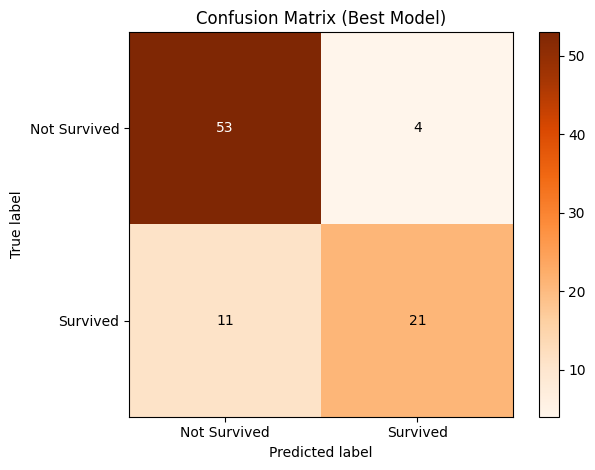

In [5]:
# رسم Confusion Matrix با رنگ‌های متفاوت (cmap: Oranges)
cm = confusion_matrix(best_data["y_test"], best_data["y_pred"])
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
plt.title("Confusion Matrix (Best Model)")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Survived', 'Survived'])
plt.yticks(tick_marks, ['Not Survived', 'Survived'])
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()